In [10]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [6]:
print(1 and 9)

9


In [11]:
load_dotenv()
DATASET = os.getenv("DATASET")
PREPARED_DATASET = os.getenv("PREPARED_DATASET") 

In [12]:
def calculate_slope(x, y, window_size=5):
    features = []
    n = len(x)
    for i in range(n):
        # Берем окрестность вокруг текущей точки
        start = max(0, i - window_size)
        end = min(n, i + window_size + 1)
        
        # Вычисляем признаки
        local_x = x[start:end]
        local_y = y[start:end]
        
        if len(local_x) < 2:
            features.append([0, 0, 0])
            continue
            
        # 1. Средний наклон в окрестности
        slopes = np.diff(local_y) / np.diff(local_x)
        mean_slope = np.mean(slopes)
        
        # 2. Дисперсия наклона
        slope_var = np.var(slopes)
        
        # 3. Кривизна (изменение наклона)
        # можно смотреть без abs для использования выпуклости/вогнутости
        if len(slopes) > 1:
            curvature = np.mean(np.abs(np.diff(slopes)))
        else:
            curvature = 0
            
        features.append([mean_slope, slope_var, curvature])
    
    return np.array(features)

In [13]:
file_name = "norm.csv"
input_dataset = PREPARED_DATASET+file_name
df = pd.read_csv(input_dataset, sep ="|") 
x = list(df.iloc[:, 0])
y = list(df.iloc[:, 1])

features = calculate_slope(x, y)
# print(features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

model = Sequential([
    LSTM(64, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    RepeatVector(SEQ_LENGTH),
    LSTM(64, return_sequences=True),
    TimeDistributed(Dense(1))
])

#model = Sequential([
#    Dense(64, activation='relu', input_shape=(3,)),
#    Dropout(0.2),
#    Dense(32, activation='relu'),
#    Dense(3, activation='softmax')  # 3 класса - три типа поведения
#])

#model.compile(optimizer=Adam(0.001),
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])


# print(scaled_features)

plt.plot(x, y, color="black")
plt.title("norm")

NameError: name 'SEQ_LENGTH' is not defined

Text(0.5, 1.0, 'defect1')

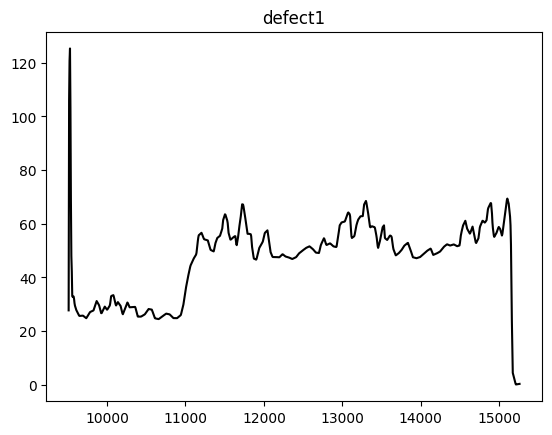

In [10]:
file_name = "defect1.csv"
input_dataset = PREPARED_DATASET+file_name
df = pd.read_csv(input_dataset, sep ="|") 
x = list(df.iloc[:, 0])
y = list(df.iloc[:, 1])

plt.plot(x, y, color="black")
plt.title("defect1")

Text(0.5, 1.0, 'defect2')

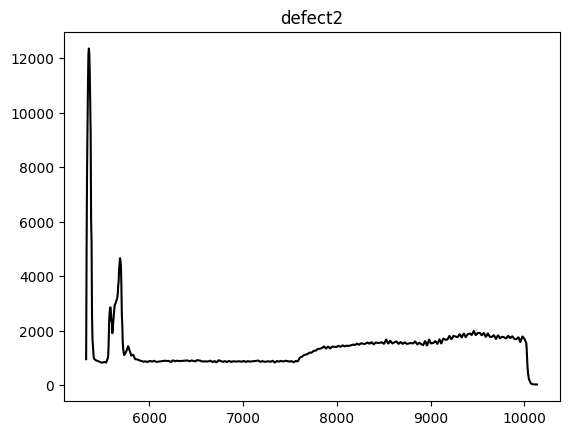

In [11]:
file_name = "defect2.csv"
input_dataset = PREPARED_DATASET+file_name
df = pd.read_csv(input_dataset, sep ="|") 
x = list(df.iloc[:, 0])
y = list(df.iloc[:, 1])

plt.plot(x, y, color="black")
plt.title("defect2")